In [ ]:
#Netflix Data Analysis using Python

## Objective:
The objective of this project is to perform detailed data cleaning, preprocessing, and exploratory data analysis (EDA) on
Netflix content data to understand content distribution, growth trends, genres, ratings, and global reach.

This notebook complements the Power BI dashboard by providing technical insights and data preparation steps.


In [15]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [9]:
#loading the dataset
df = pd.read_csv("netflix1.csv")
df.head()
df.shape
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8790 non-null   str  
 1   type          8790 non-null   str  
 2   title         8790 non-null   str  
 3   director      8790 non-null   str  
 4   country       8790 non-null   str  
 5   date_added    8790 non-null   str  
 6   release_year  8790 non-null   int64
 7   rating        8790 non-null   str  
 8   duration      8790 non-null   str  
 9   listed_in     8790 non-null   str  
dtypes: int64(1), str(9)
memory usage: 686.8 KB


In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df['country'].fillna('Not Given', inplace=True)
df['director'].fillna('Not Given', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_27112\549972849.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['country'].fillna('Not Given', inplace=True)
C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_27112\549972849.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assig

In [12]:
# Handling missing values safely 

df['country'] = df['country'].fillna('Not Given')
df['director'] = df['director'].fillna('Not Given')

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Verify missing values
df.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [13]:
#feature engineering
df['year_added'] = df['date_added'].dt.year
df[['date_added', 'year_added']].head()


,date_added,year_added
0,2021-09-25,2021
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-22,2021
4,2021-09-24,2021


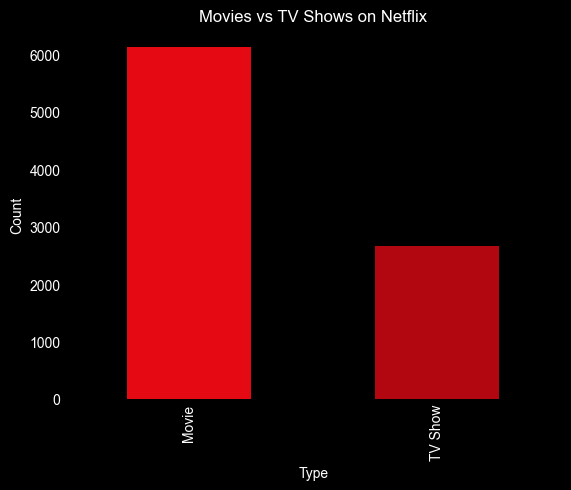

In [16]:
#movies vs tv shows
df['type'].value_counts()
df['type'].value_counts().plot(
    kind='bar',
    color=['#E50914', '#B20710'],
    title='Movies vs TV Shows on Netflix'
)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


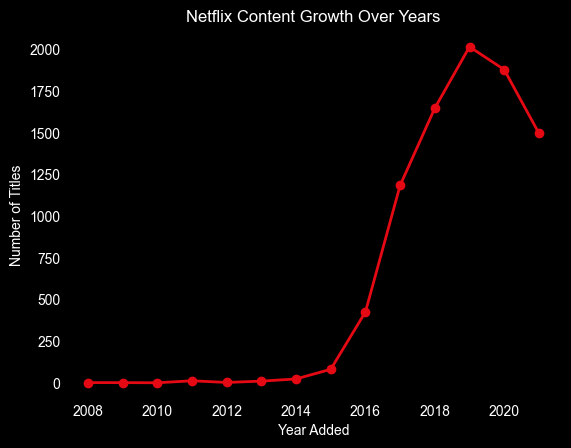

In [17]:
#content growth over years
df.groupby('year_added').size().plot(
    kind='line',
    marker='o',
    linewidth=2,
    color='#E50914',
    title='Netflix Content Growth Over Years'
)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


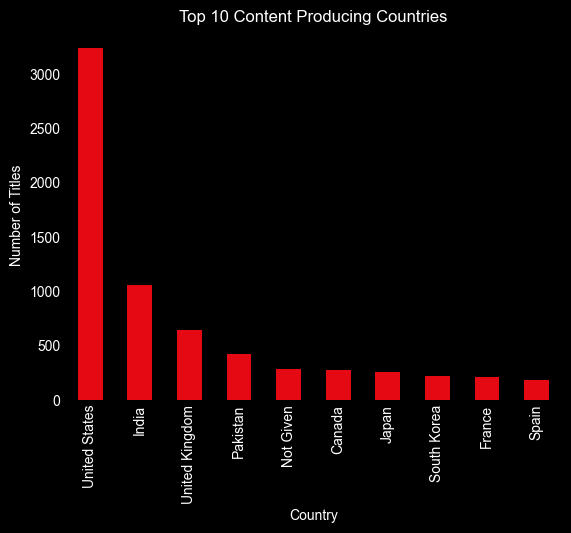

In [18]:
#country wise analysis
top_countries = df['country'].value_counts().head(10)
top_countries
top_countries.plot(
    kind='bar',
    color='#E50914',
    title='Top 10 Content Producing Countries'
)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


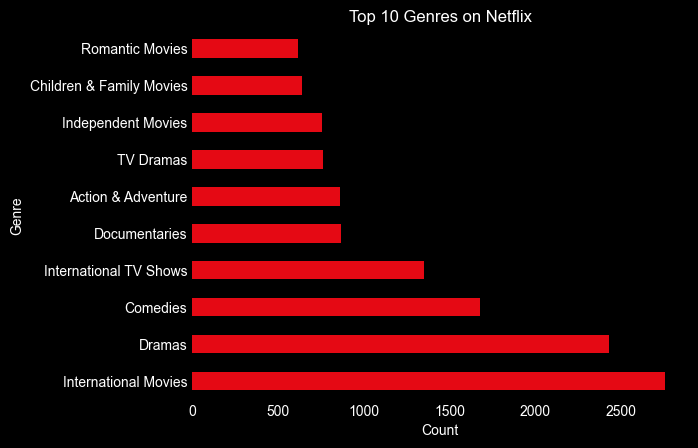

In [19]:
#genre analysis
genres = df['listed_in'].str.split(', ').explode()
genres.value_counts().head(10)
genres.value_counts().head(10).plot(
    kind='barh',
    color='#E50914',
    title='Top 10 Genres on Netflix'
)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


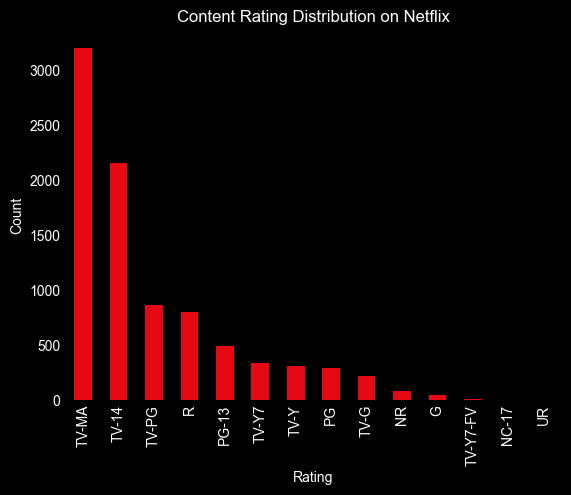

In [20]:
#rating distribution
df['rating'].value_counts()
df['rating'].value_counts().plot(
    kind='bar',
    color='#E50914',
    title='Content Rating Distribution on Netflix'
)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
### Insight 1: Shift in Content Strategy
Netflix initially focused more on movies, but over time the number of TV shows increased significantly.
This indicates a strategic shift toward long-form episodic content to improve user retention.


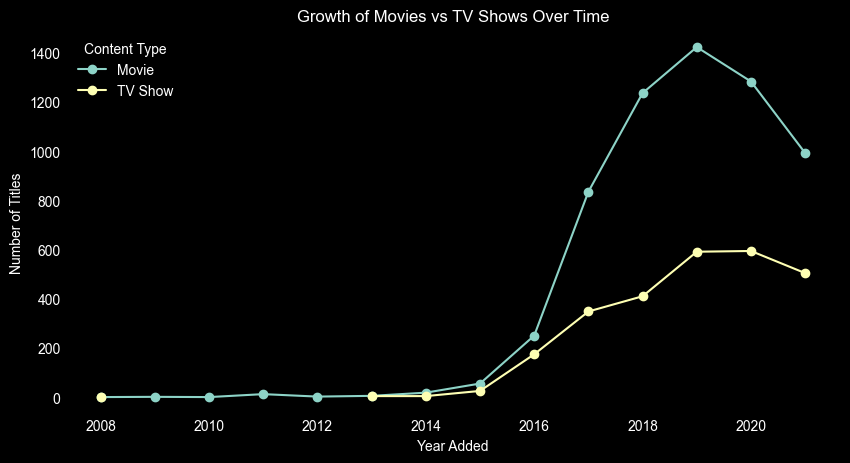

In [21]:
type_year = df.groupby(['year_added', 'type']).size().unstack()

type_year.plot(
    kind='line',
    marker='o',
    figsize=(10,5)
)

plt.title("Growth of Movies vs TV Shows Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Content Type")
plt.show()


In [ ]:
### Insight 2: Global Expansion Pattern
The United States consistently leads Netflix content production.
However, India shows rapid growth in recent years, indicating Netflix’s focus on emerging markets.


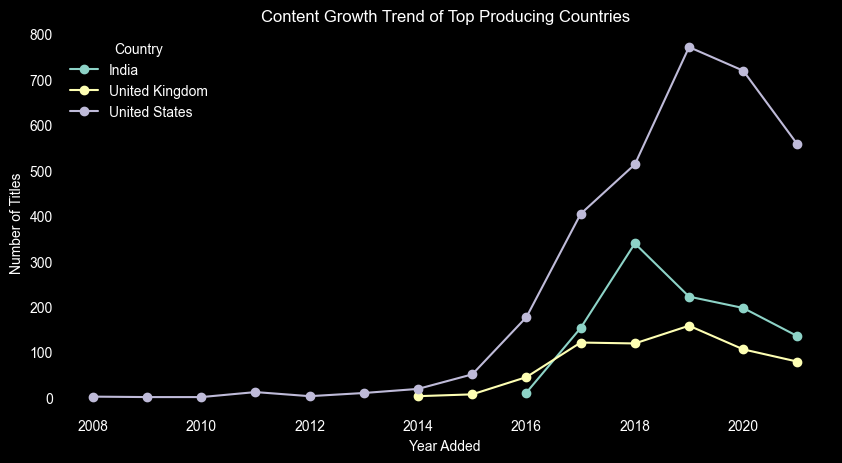

In [22]:
top_countries = df['country'].value_counts().head(3).index

country_year = df[df['country'].isin(top_countries)]
country_year = country_year.groupby(['year_added', 'country']).size().unstack()

country_year.plot(
    kind='line',
    marker='o',
    figsize=(10,5)
)

plt.title("Content Growth Trend of Top Producing Countries")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Country")
plt.show()


## Key Insights:
- Netflix content increased significantly after 2016.
- Movies dominate the platform, but TV shows are growing steadily.
- United States and India are the largest content producers.
- Drama and International Movies are the most common genres.
- TV-MA is the most frequent rating, indicating focus on mature audiences.


## Conclusion:
This notebook demonstrates end-to-end data cleaning, feature engineering, and exploratory analysis of Netflix content.
The Power BI dashboard provides a high-level overview, while Python enables deep analytical insights.
